In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
# Load dataset
file_path = "C:/Users/Vikas/Desktop/Customer_Segementation/Data/Data/Dataset.csv"
df = pd.read_csv(file_path)

In [5]:
# Check for missing values and fill missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

In [6]:
# Drop CUST_ID as it's just an identifier
df = df.drop('CUST_ID', axis=1)

In [7]:
# Apply scaling to the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [8]:
# Step 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df_scaled.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean   4.195651e-16       1.209548e-14 -9.278518e-16      3.916048e-15   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -7.516398e-01      -3.703271e+00 -4.695519e-01     -3.569340e-01   
25%   -6.900078e-01       4.904486e-02 -4.510006e-01     -3.569340e-01   
50%   -3.320286e-01       5.180838e-01 -3.004541e-01     -3.340396e-01   
75%    2.352559e-01       5.180838e-01  5.004652e-02     -9.056763e-03   
max    8.397489e+00       5.180838e-01  2.248351e+01      2.420107e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             2.275424e-15  5.693056e-15        -3.716084e-16   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.545762e-01 -4.667856e-01        -1.221758e

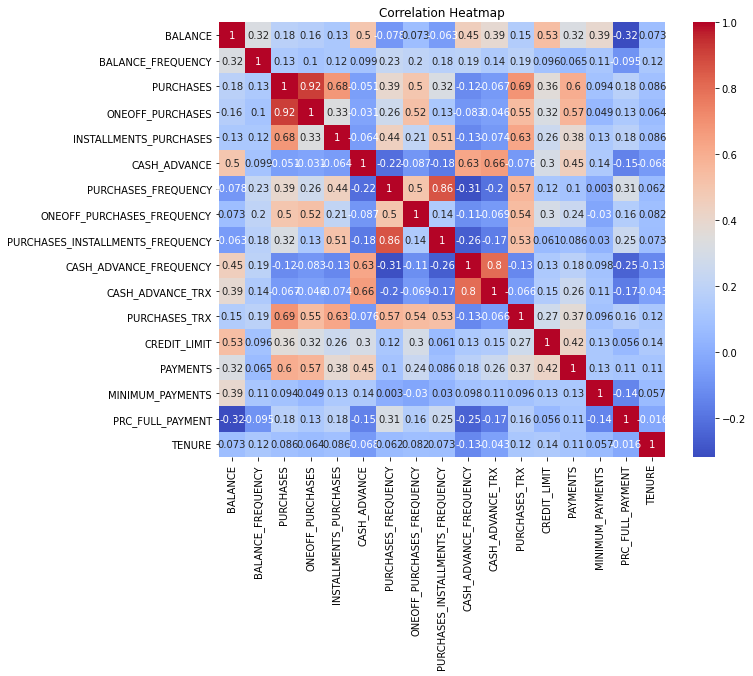

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

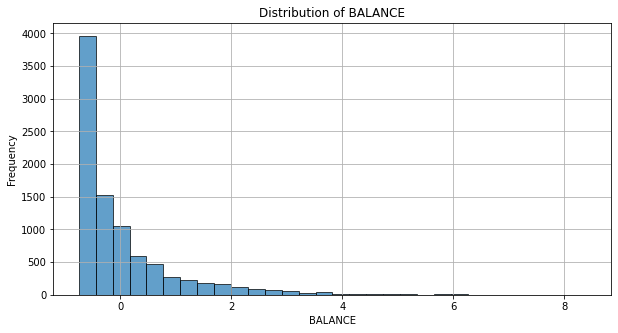

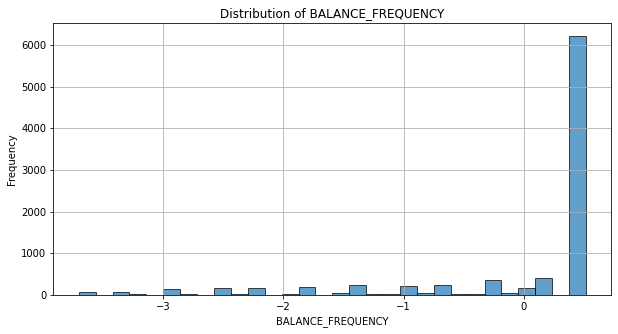

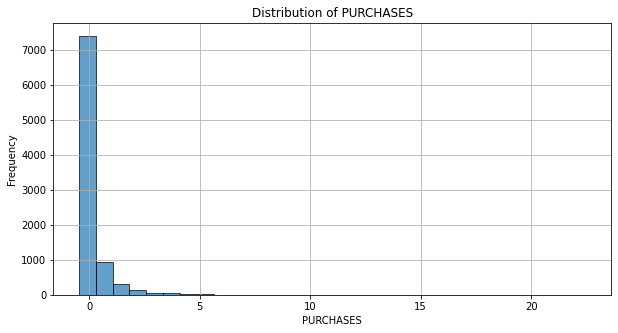

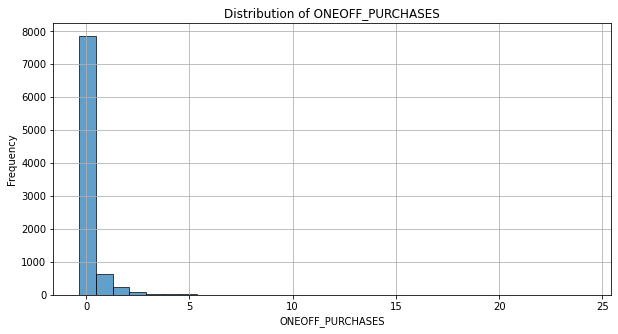

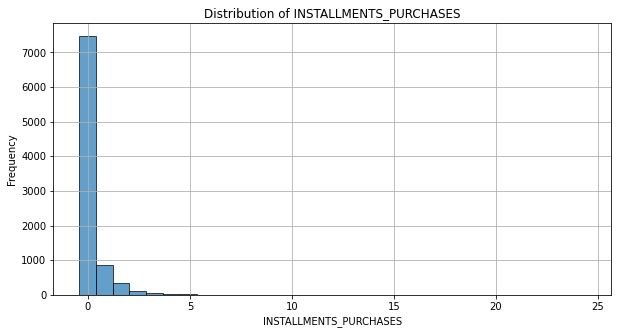

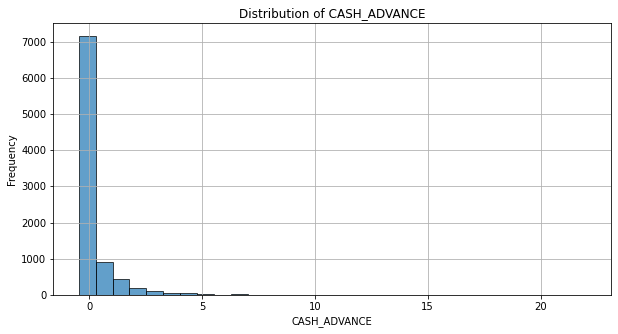

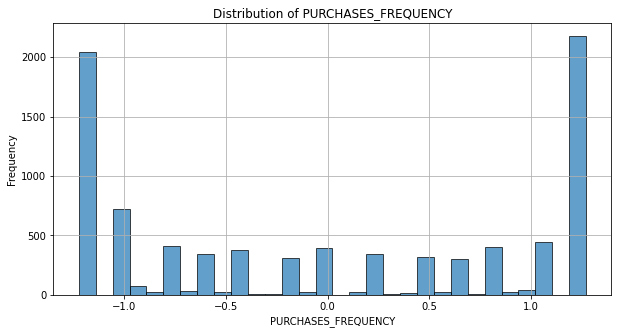

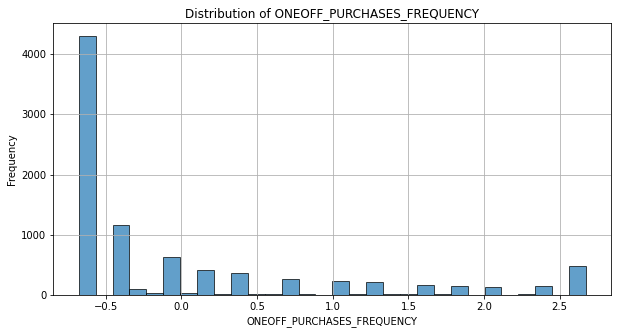

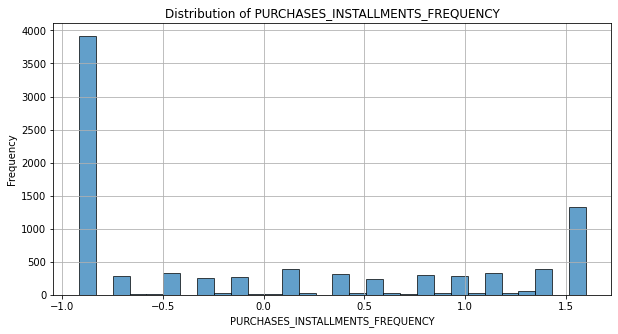

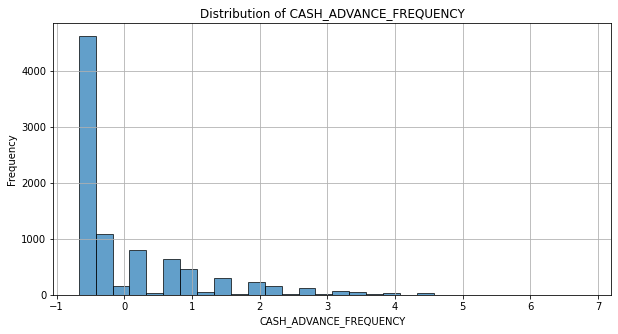

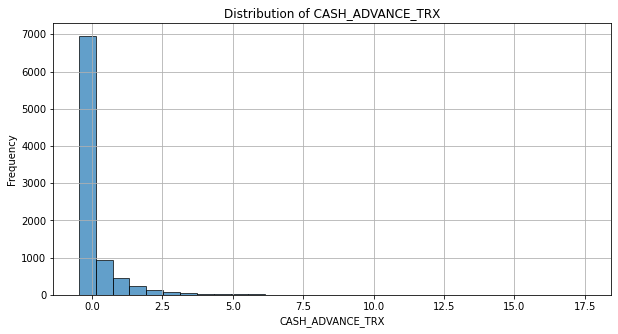

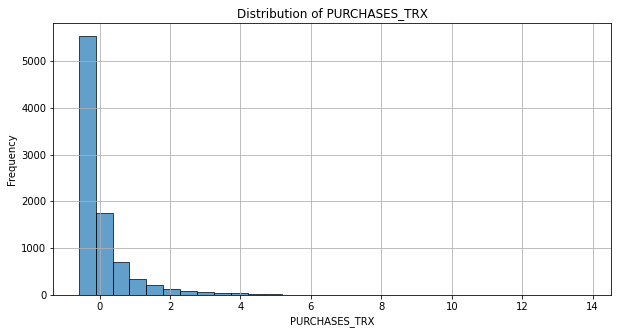

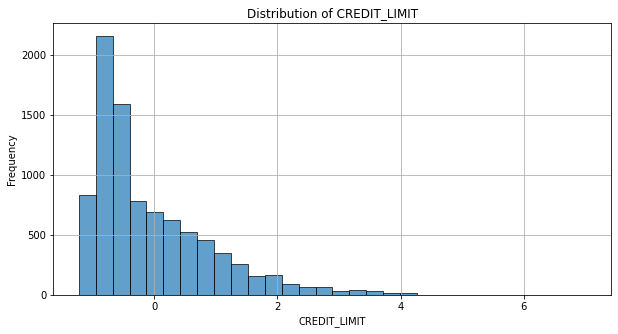

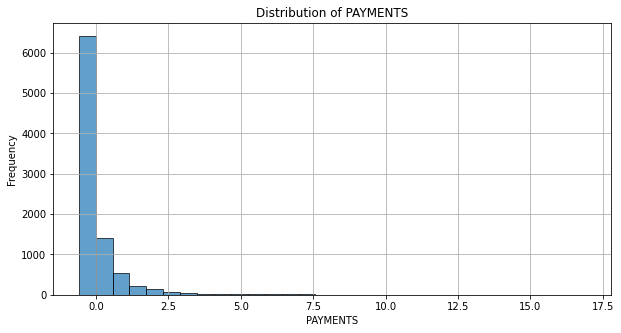

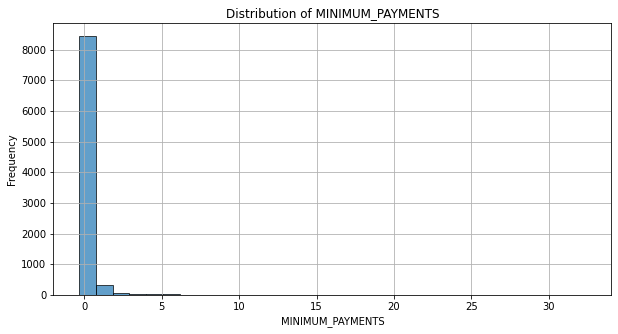

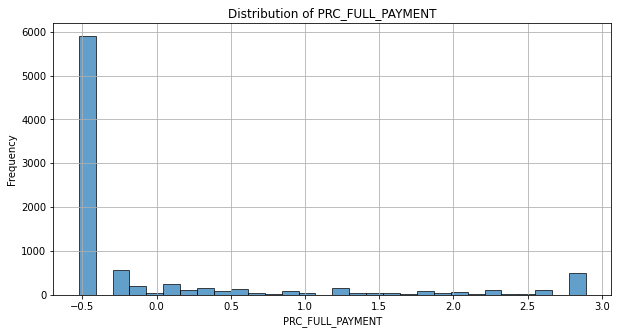

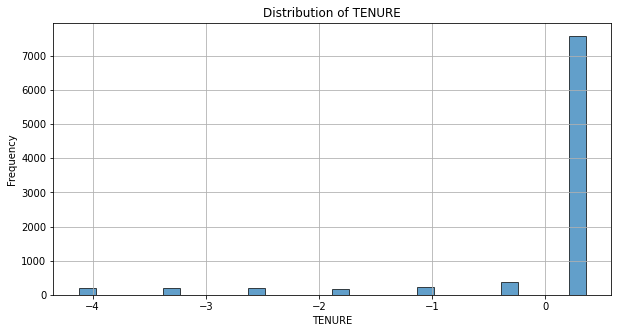

In [10]:
# Distribution plots
# Assuming df_scaled is already defined and contains numerical data
# Check if df_scaled is properly defined
print(df_scaled.info())

# Plot histograms for each feature in the DataFrame
for column in df_scaled.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df_scaled[column], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [11]:
# Step 3: Apply Clustering Algorithms

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [12]:
# Function to evaluate clustering algorithms
def evaluate_clustering(algorithm_name, labels, df_scaled):
    silhouette_avg = silhouette_score(df_scaled, labels)
    print(f'Silhouette Score for {algorithm_name}: {silhouette_avg}')
    return silhouette_avg

In [13]:
# Check for NaN and infinity values
print(f"NaN values per column:\n{df_scaled.isna().sum()}")
print(f"Infinity values per column:\n{np.isinf(df_scaled).sum()}")

NaN values per column:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Infinity values per column:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUEN

In [14]:
# Impute NaN values with the mean
from sklearn.impute import SimpleImputer

# Impute NaN values
imputer = SimpleImputer(strategy='mean')
df_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)

# Replace infinity values with NaN and then impute
df_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
df_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)

# Check again if the issue is resolved
print(f"NaN values after imputation:\n{df_scaled.isna().sum()}")


NaN values after imputation:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [15]:
#  K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Evaluate clustering
evaluate_clustering("K-Means", df_scaled['KMeans_Cluster'], df_scaled)

Silhouette Score for K-Means: 0.25839089990653036


0.25839089990653036

In [16]:
# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Exclude noise (-1) for silhouette score
non_noise_points = df_scaled[df_scaled['DBSCAN_Cluster'] != -1]
evaluate_clustering("DBSCAN (excluding noise)", non_noise_points['DBSCAN_Cluster'], non_noise_points)

Silhouette Score for DBSCAN (excluding noise): 0.5945278134027465


0.5945278134027465

In [17]:
# 3. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
df_scaled['Agglomerative_Cluster'] = agg_clustering.fit_predict(df_scaled)
evaluate_clustering("Agglomerative Clustering", df_scaled['Agglomerative_Cluster'], df_scaled)

Silhouette Score for Agglomerative Clustering: 0.27770232584155674


0.27770232584155674

In [18]:
# 4. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
df_scaled['GMM_Cluster'] = gmm.fit_predict(df_scaled)
evaluate_clustering("Gaussian Mixture Model", df_scaled['GMM_Cluster'], df_scaled)

Silhouette Score for Gaussian Mixture Model: 0.05793407503073586


0.05793407503073586

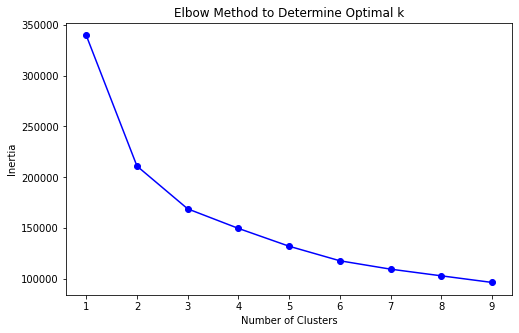

In [19]:
# Step 4: Visualizing the Elbow Method for K-Means

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
# Step 5: Cluster Profiling for K-Means

cluster_profiles = df_scaled.groupby('KMeans_Cluster').mean()
print(cluster_profiles)

                 BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                             
0              -0.321688           0.242574   0.109044          0.000926   
1               1.459578           0.384753  -0.234638         -0.163914   
2              -0.265552          -0.368944  -0.343190         -0.230500   
3               0.954485           0.462694   3.125845          2.713251   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                             0.255904     -0.366373             0.983721   
1                            -0.253747      1.688972            -0.504848   
2                            -0.387798     -0.182691            -0.797823   
3                             2.406470     -0.155091             1.136338   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \


In [21]:
# Sample marketing strategy based on profiles (manual analysis)
# Cluster 0: High balance, frequent cash advances – Offer premium services and perks.
# Cluster 1: Low balance, minimal transactions – Upsell or offer credit improvement plans.

# Step 6: Bonus - PCA for Dimensionality Reduction

from sklearn.decomposition import PCA

# Reduce dimensions using PCA to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster', 'GMM_Cluster']))

In [22]:
# Apply K-Means on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=4, random_state=42)
df_scaled['PCA_Cluster'] = kmeans_pca.fit_predict(df_pca)

In [23]:
# Evaluate silhouette score after PCA
pca_silhouette = silhouette_score(df_pca, kmeans_pca.labels_)
print(f'Silhouette Score after PCA: {pca_silhouette}')

Silhouette Score after PCA: 0.40766808113956116


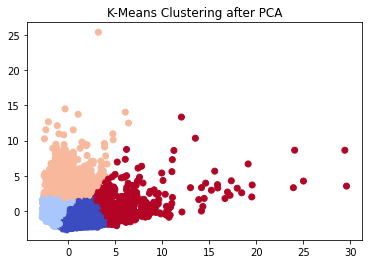

In [24]:
# Visualizing clusters after PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['PCA_Cluster'], cmap='coolwarm')
plt.title('K-Means Clustering after PCA')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define a function to evaluate and compare clustering algorithms
def evaluate_clustering_metrics(algorithm_name, labels, data):
    # Silhouette Score
    if len(np.unique(labels)) > 1:  # Ensure more than 1 cluster exists
        silhouette = silhouette_score(data, labels)
    else:
        silhouette = None
    
    # Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(data, labels)
    
    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Print the results
    print(f"{algorithm_name} Evaluation Metrics (Before PCA):")
    if silhouette is not None:
        print(f"  Silhouette Score: {silhouette:.4f}")
    else:
        print("  Silhouette Score: Not Applicable (1 cluster)")
    
    print(f"  Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f}")
    print("\n")

# Ensure that df_scaled contains only numeric data
data_for_evaluation = df_scaled.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster', 'GMM_Cluster'], errors='ignore')

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(data_for_evaluation)
evaluate_clustering_metrics("K-Means", df_scaled['KMeans_Cluster'], data_for_evaluation)

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(data_for_evaluation)
evaluate_clustering_metrics("DBSCAN", df_scaled['DBSCAN_Cluster'], data_for_evaluation)

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
df_scaled['Agglomerative_Cluster'] = agglo.fit_predict(data_for_evaluation)
evaluate_clustering_metrics("Agglomerative Clustering", df_scaled['Agglomerative_Cluster'], data_for_evaluation)

# 4. Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=42)
df_scaled['GMM_Cluster'] = gmm.fit_predict(data_for_evaluation)
evaluate_clustering_metrics("Gaussian Mixture", df_scaled['GMM_Cluster'], data_for_evaluation)


K-Means Evaluation Metrics (Before PCA):
  Silhouette Score: 0.2122
  Calinski-Harabasz Index: 1767.4788
  Davies-Bouldin Index: 1.5097


DBSCAN Evaluation Metrics (Before PCA):
  Silhouette Score: -0.3930
  Calinski-Harabasz Index: 27.2398
  Davies-Bouldin Index: 1.3369


Agglomerative Clustering Evaluation Metrics (Before PCA):
  Silhouette Score: 0.1823
  Calinski-Harabasz Index: 1571.5300
  Davies-Bouldin Index: 1.6082


Gaussian Mixture Evaluation Metrics (Before PCA):
  Silhouette Score: 0.1509
  Calinski-Harabasz Index: 1346.8701
  Davies-Bouldin Index: 1.9324




In [26]:
# After applying PCA and assesing K-means
# Evaluate Silhouette Score
pca_silhouette = silhouette_score(df_pca, kmeans_pca.labels_)
print(f'Silhouette Score after PCA: {pca_silhouette}')

# Evaluate Calinski-Harabasz Index
pca_calinski_harabasz = calinski_harabasz_score(df_pca, kmeans_pca.labels_)
print(f'Calinski-Harabasz Index after PCA: {pca_calinski_harabasz}')

# Evaluate Davies-Bouldin Index
pca_davies_bouldin = davies_bouldin_score(df_pca, kmeans_pca.labels_)
print(f'Davies-Bouldin Index after PCA: {pca_davies_bouldin}')

Silhouette Score after PCA: 0.40766808113956116
Calinski-Harabasz Index after PCA: 5822.830160748833
Davies-Bouldin Index after PCA: 0.8006736361170079


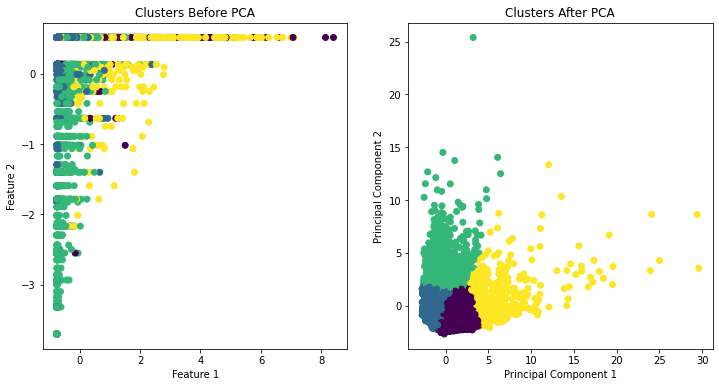

In [27]:
import matplotlib.pyplot as plt

# Assuming you have the original data (df_scaled) and the PCA-transformed data (df_pca)
# along with the cluster labels (e.g., df_scaled['KMeans_Cluster'])

# Plot clusters before PCA (assuming you have at least two features)
if df_scaled.shape[1] >= 2:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['KMeans_Cluster'], cmap='viridis')
    plt.title('Clusters Before PCA')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot clusters after PCA
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['PCA_Cluster'], cmap='viridis')
plt.title('Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [28]:
# Assuming you have clusters in a 'Cluster' column:
cluster_profiles = df_scaled.groupby('Cluster').mean()
print(cluster_profiles)

KeyError: 'Cluster'